In [2]:
import pandas as pd
from sklearn import preprocessing

In [131]:
ds = pd.read_csv('./data/train.csv')
ds.head()
# ds.groupby(['Embarked', 'Survived'])['Embarked'].count()
# ds = ds.fillna(ds.mean())
# ds['Age_10'] = ds['Age'] // 10
# ds['Fare_5'] = ds['Fare'] // 5
# ds = ds.drop(['Name','Cabin','Ticket', 'Age', 'Fare', 'PassengerId'], 1)

ds['Embarked'] = ds['Embarked'].fillna('S')

cleanup_nums = {"Sex":     {"male": 1, "female": 0},
                "Embarked": {"S": 0, "C": 1, "Q": 2}}
ds.replace(cleanup_nums, inplace=True)
# ds = ds.fillna(ds.median())
# ds


ds.groupby(ds['Fare']//10)['Fare'].count()
fare_bins = [0,11,51,101,201,1000]
ds['Fare_range'] = pd.cut(ds['Fare'], fare_bins)
ds['Fare_range'] = ds['Fare_range'].fillna(pd.Interval(11, 51, closed='right'))

age_bins = [0,3,10,18,50,60,120]
ds['Age_range'] = pd.cut(ds['Age'], age_bins)
ds['Age_range'].unique()
ds.groupby(ds['Age_range'])['Age_range'].count()
ds['Age_range'] = ds['Age_range'].fillna(pd.Interval(18, 50, closed='right'))
ds = ds.drop(['PassengerId', 'Ticket', 'Cabin', 'Age', 'Fare', 'Name'], 1)

ds.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Fare_range,Age_range
0,0,3,1,1,0,0,"(0, 11]","(18, 50]"
1,1,1,0,1,0,1,"(51, 101]","(18, 50]"
2,1,3,0,0,0,0,"(0, 11]","(18, 50]"
3,1,1,0,1,0,0,"(51, 101]","(18, 50]"
4,0,3,1,0,0,0,"(0, 11]","(18, 50]"


In [133]:
fare_ranges = sorted(ds['Fare_range'].unique())
fare_dict = {}
for i in range(len(fare_ranges)):
    fare_dict[fare_ranges[i]] = i
Age_dict = {}
Age_ranges = sorted(ds['Age_range'].unique())
for i in range(len(Age_ranges)):
    Age_dict[Age_ranges[i]] = i
cleanups = {"Age_range":     Age_dict, 'Fare_range': fare_dict}
ds.replace(cleanups, inplace=True)
ds

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Fare_range,Age_range
0,0,3,1,1,0,0,0,3
1,1,1,0,1,0,1,2,3
2,1,3,0,0,0,0,0,3
3,1,1,0,1,0,0,2,3
4,0,3,1,0,0,0,0,3
5,0,3,1,0,0,2,0,3
6,0,1,1,0,0,0,2,4
7,0,3,1,3,1,0,1,0
8,1,3,0,0,2,0,1,3
9,1,2,0,1,0,1,1,2


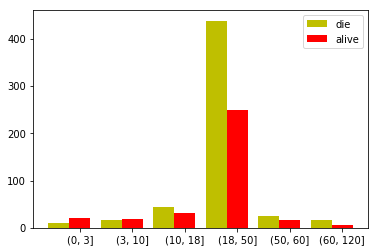

In [93]:
import matplotlib.pyplot as plt

feature_name = 'Age_range'
dies = ds[ds['Survived']==0]
dies = dies.groupby(feature_name).count()['Survived']
dies = dies.as_matrix()
alive = ds[ds['Survived']==1]
alive = alive.groupby(feature_name).count()['Survived']
alive = alive.as_matrix()
name_list = sorted(ds[feature_name].unique())
(dies, alive)

x = list(range(len(dies)))
total_width, n = 0.8, 2
width = total_width / n
 
plt.bar(x, dies, width=width, label='die',fc = 'y')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, alive, width=width, label='alive',tick_label = name_list,fc = 'r')
plt.legend()
plt.show()



In [125]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

In [137]:
arr = ds.as_matrix()
Y = arr[:,:1]
Y
X = arr[:,1:]
X = preprocessing.scale(X)
for random_state in range(20):
    X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=random_state)
    clf = svm.SVC(kernel='rbf', C=1).fit(X_train, y_train)
    print(clf.score(X_val, y_val))

/home/weize/workspace/python/VENV-3.5.2/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/weize/workspace/python/VENV-3.5.2/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8134328358208955
0.7686567164179104
0.7985074626865671
0.8022388059701493
0.8470149253731343
0.8507462686567164
0.8432835820895522
0.7686567164179104
0.8283582089552238
0.7910447761194029
0.8246268656716418
0.8395522388059702
0.7835820895522388
0.8208955223880597
0.8470149253731343
0.8432835820895522
0.8134328358208955
0.8022388059701493
0.8507462686567164
0.832089552238806


In [140]:
ds_test = pd.read_csv('./data/test.csv')
ds_test['Embarked'] = ds_test['Embarked'].fillna('S')

cleanup_nums = {"Sex":     {"male": 1, "female": 0},
                "Embarked": {"S": 0, "C": 1, "Q": 2}}
ds_test.replace(cleanup_nums, inplace=True)
fare_bins = [0,11,51,101,201,1000]
ds_test['Fare_range'] = pd.cut(ds_test['Fare'], fare_bins)
ds_test['Fare_range'] = ds_test['Fare_range'].fillna(pd.Interval(11, 51, closed='right'))
ids = ds_test['PassengerId']

age_bins = [0,3,10,18,50,60,120]
ds_test['Age_range'] = pd.cut(ds_test['Age'], age_bins)
ds_test['Age_range'].unique()
ds_test.groupby(ds_test['Age_range'])['Age_range'].count()
ds_test['Age_range'] = ds_test['Age_range'].fillna(pd.Interval(18, 50, closed='right'))
ds_test = ds_test.drop(['PassengerId', 'Ticket', 'Cabin', 'Age', 'Fare', 'Name'], 1)

fare_ranges = sorted(ds_test['Fare_range'].unique())
fare_dict = {}
for i in range(len(fare_ranges)):
    fare_dict[fare_ranges[i]] = i
Age_dict = {}
Age_ranges = sorted(ds_test['Age_range'].unique())
for i in range(len(Age_ranges)):
    Age_dict[Age_ranges[i]] = i
cleanups = {"Age_range": Age_dict, 'Fare_range': fare_dict}
ds_test.replace(cleanups, inplace=True)

X_test = ds_test.as_matrix()
X_test = preprocessing.scale(X_test)
X_test
Y_test = clf.predict(X_test)
Y_test
print('PassengerId,Survived')
for i in range(len(ids)):
    print(ids[i], ',', int(Y_test[i]))

PassengerId,Survived
892 , 0
893 , 0
894 , 0
895 , 0
896 , 0
897 , 0
898 , 1
899 , 0
900 , 1
901 , 0
902 , 0
903 , 0
904 , 1
905 , 0
906 , 1
907 , 1
908 , 0
909 , 0
910 , 0
911 , 1
912 , 0
913 , 1
914 , 1
915 , 0
916 , 1
917 , 0
918 , 1
919 , 0
920 , 0
921 , 0
922 , 0
923 , 0
924 , 0
925 , 0
926 , 0
927 , 0
928 , 0
929 , 0
930 , 0
931 , 0
932 , 0
933 , 0
934 , 0
935 , 1
936 , 1
937 , 0
938 , 0
939 , 0
940 , 1
941 , 1
942 , 0
943 , 0
944 , 1
945 , 1
946 , 0
947 , 0
948 , 0
949 , 0
950 , 0
951 , 1
952 , 0
953 , 0
954 , 0
955 , 1
956 , 0
957 , 1
958 , 1
959 , 0
960 , 0
961 , 0
962 , 1
963 , 0
964 , 0
965 , 0
966 , 1
967 , 0
968 , 0
969 , 1
970 , 0
971 , 1
972 , 1
973 , 0
974 , 0
975 , 0
976 , 0
977 , 0
978 , 1
979 , 1
980 , 1
981 , 1
982 , 0
983 , 0
984 , 1
985 , 0
986 , 0
987 , 0
988 , 1
989 , 0
990 , 0
991 , 0
992 , 1
993 , 0
994 , 0
995 , 0
996 , 1
997 , 0
998 , 0
999 , 0
1000 , 0
1001 , 0
1002 , 0
1003 , 1
1004 , 1
1005 , 1
1006 , 1
1007 , 0
1008 , 0
1009 , 1
1010 , 0
1011 , 1
1012 , 

/home/weize/workspace/python/VENV-3.5.2/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [78]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
model = Sequential()
model.add(Dense(16, input_shape=(6,), kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val))
model.fit(X, Y, epochs=30, batch_size=32)
Y_test = model.predict_classes(X_test)
print('PassengerId,Survived')
for i in range(len(ids)):
    print(ids[i], ',', Y_test[i][0])

Epoch 1/30
891/891 [==============================] - 1s 1ms/step - loss: 0.7885 - acc: 0.5769
Epoch 2/30
891/891 [==============================] - 0s 108us/step - loss: 0.6938 - acc: 0.6947
Epoch 3/30
891/891 [==============================] - 0s 142us/step - loss: 0.6320 - acc: 0.7351
Epoch 4/30
891/891 [==============================] - 0s 93us/step - loss: 0.5893 - acc: 0.7755
Epoch 5/30
891/891 [==============================] - 0s 74us/step - loss: 0.5604 - acc: 0.7890
Epoch 6/30
891/891 [==============================] - 0s 71us/step - loss: 0.5418 - acc: 0.7912
Epoch 7/30
891/891 [==============================] - 0s 72us/step - loss: 0.5299 - acc: 0.7924
Epoch 8/30
891/891 [==============================] - 0s 74us/step - loss: 0.5223 - acc: 0.7969
Epoch 9/30
891/891 [==============================] - 0s 80us/step - loss: 0.5165 - acc: 0.7957
Epoch 10/30
891/891 [==============================] - 0s 89us/step - loss: 0.5121 - acc: 0.7957
Epoch 11/30
891/891 [=================